# 안녕하세요^^ 
# AIVLE 미니 프로젝트에 오신 여러분을 환영합니다.
* 본 과정에서는 실제 사례와 데이터를 기반으로 문제를 해결하는 전체 과정을 자기 주도형 실습으로 진행해볼 예정입니다.
* 앞선 교육과정을 정리하는 마음과 지금까지 배운 내용을 바탕으로 문제 해결을 해볼게요!
* 미니 프로젝트를 통한 문제 해결 과정 'A에서 Z까지', 지금부터 시작합니다!

---

## 0. 환경 설정하기

### 1) 구글 드라이브 연결하기

In [22]:
# 코랩 사용 시 구글 드라이브 연결
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 2) 경로 확인하기
- "WORK_SPACE" 에 본인 작업 경로 작성 후 실행(구글 드라이브 최상위에 압축해제 시 그대로 실행. 수정 X).<br>

<font color="red">※ 주의. 나머지 경로는 절대 변경하지 마세요.</font>

In [23]:
# ROOT_PATH 확인 
import os

# 구글 드라이브 내 프로젝트 압축해제된 영역 (구글 드라이브 최상위에 압축해제 시 그대로 실행 수정 X)
WORK_SPACE = ""

if os.getcwd() == '/content' :
  # 구글 드라이브 사용 시 
  ROOT_PATH = "/content/drive/MyDrive/"+WORK_SPACE+"/AIVLE3rd_individual"
else :
  ROOT_PATH = os.path.abspath('..')
# Train 데이터 셋 경로
TRAIN_PATH = ROOT_PATH + "/train"
# MODEL 저장 경로
MODEL_PATH = ROOT_PATH + "/model"

### 3) 라이브러리 불러오기
필요시 추가 라이브러리는 설치해서 사용하세요.

In [24]:
# 필요 라이브러리 불러오기.
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Embedding
from keras.layers import Conv2D, MaxPooling2D, Flatten
from keras.callbacks import ModelCheckpoint, EarlyStopping

### 4) GPU 환경 확인하기
tensorflow가 GPU를 활용하고 있는지 확인하려면, tensorflow에서 제공하는 device_lib 라이브러리를 활용하면 됩니다.

In [25]:
# GPU 환경 확인하기
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 1665234032879381916
 xla_global_id: -1, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 14444920832
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 6585663430708260805
 physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
 xla_global_id: 416903419]

---

# 1. ImageDataGenerator 생성하기
앞의 <font color="red">__'[study] 2.데이터전처리'__ </font>과정에서 사용하였던 ImageDataGenerator를 그대로 가져오시면 됩니다.

<font color="green">[실습문제]</font> 1. ImageDataGenerator 생성하기
+ 모델 검증을 위해 데이터를 train:validation(8:2)로 분할합니다.
+ 모델 성능 개선을 위해 데이터 증식(Data augmentation)이 필요 시 자유롭게 설정

In [26]:
batch_size = 16
img_height = 480
img_width = 854

In [27]:
# 실습해보세요.
train_datagen = ImageDataGenerator(
    rescale = 1. / 255,
    validation_split = 0.2
)

# train_genrator 생성
train_generator = train_datagen.flow_from_directory(
    TRAIN_PATH,
    batch_size = 16,
    target_size = (img_height, img_width),
    class_mode = 'categorical',
    subset = 'training'
)

# validation_generator 생성
validation_generator = train_datagen.flow_from_directory(
    TRAIN_PATH,
    batch_size = 16,
    target_size = (img_height, img_width),
    class_mode = 'categorical',
    subset = 'validation'
)

Found 695 images belonging to 4 classes.
Found 172 images belonging to 4 classes.


In [28]:
type(train_generator)

keras.preprocessing.image.DirectoryIterator

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as keras

---

# 2. 모델 구성하기
+ KeyPoint : 합성곱 신경망 (CNN) 모델 구성.

<font color="green">[실습문제]</font> 2. CNN 모델을 설계해 보세요.
* 케라스를 이용해서 CNN 모델을 설계합니다.

In [30]:
from keras.backend import categorical_crossentropy
from keras.layers.normalization.batch_normalization_v1 import BatchNormalization
# 실습해주세요.
# model = Sequential([
    # Conv2D, MaxPooling2D 조합으로 층을 쌓습니다. 첫번째 입력층의 input_shape은 imageDataGenerator target size로 지정합니다.
keras.backend.clear_session()
model = keras.models.Sequential()
model.add(keras.layers.Input(shape = (480,854,3 )))
model.add(keras.layers.Conv2D(filters = 32, kernel_size = (3,3), padding = 'same', activation = 'relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPool2D(pool_size = (2,2), strides = (2,2)))
model.add(keras.layers.Dropout(rate = 0.25))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation = 'swish'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(rate = 0.25))

model.add(keras.layers.Dense(4, activation = 'softmax'))

# model = keras.models.Model(il, ol)

model.compile(loss = keras.losses.categorical_crossentropy, optimizer = keras.optimizers.Adam(), metrics = ['accuracy'])
# ])


In [31]:
# 설계된 모델을 확인해보세요.
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 480, 854, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 480, 854, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 240, 427, 32)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 240, 427, 32)      0         
                                                                 
 flatten (Flatten)           (None, 3279360)           0         
                                                                 
 dense (Dense)               (None, 32)                1

<font color="green">[실습문제]</font> 3. 모델을 학습시켜 보세요.
* 위에서 설계한 모델에 데이터를 가지고 학습을 진행 합니다. 
* history 변수에 학습 결과를 입력 받습니다.
* callback 함수로 ModelCheckpoint와 EarlyStopping을 사용하세요.(best만 저장)
* 학습한 모델의 weight를 경로 MODEL_PATH 에 저장해주세요.
* val_loss 기준으로 모니터링 해주세요.

In [32]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint

In [33]:
# 실습해보세요.
# 모델 컴파일 
# model.compile(
    
# )

# early_stopping 
checkpoint = ModelCheckpoint(
    filepath = MODEL_PATH,
    save_best_only = True,
    save_weights_only = True
)

# early_stopping
es = EarlyStopping(
    monitor = 'val_loss',
    patience = 5,
    verbose = 1,
    restore_best_weights = True
)

In [34]:
# 모델 학습
history = model.fit(
    train_generator, verbose = 1, callbacks = [es, checkpoint], epochs = 10, validation_data = validation_generator
)

Epoch 1/10
44/44 [==============================] - 25s 564ms/step - loss: 1.5978 - accuracy: 0.4921 - val_loss: 1.3415 - val_accuracy: 0.3488
Epoch 2/10
44/44 [==============================] - 24s 536ms/step - loss: 0.5218 - accuracy: 0.8216 - val_loss: 1.2267 - val_accuracy: 0.4709
Epoch 3/10
44/44 [==============================] - 22s 507ms/step - loss: 0.2143 - accuracy: 0.9626 - val_loss: 1.2256 - val_accuracy: 0.3314
Epoch 4/10
44/44 [==============================] - 22s 507ms/step - loss: 0.1146 - accuracy: 0.9928 - val_loss: 1.1663 - val_accuracy: 0.5291
Epoch 5/10
44/44 [==============================] - 25s 575ms/step - loss: 0.0619 - accuracy: 0.9971 - val_loss: 1.0644 - val_accuracy: 0.5291
Epoch 6/10
44/44 [==============================] - 25s 571ms/step - loss: 0.0430 - accuracy: 1.0000 - val_loss: 0.9029 - val_accuracy: 0.7093
Epoch 7/10
44/44 [==============================] - 24s 533ms/step - loss: 0.0303 - accuracy: 1.0000 - val_loss: 0.7771 - val_accuracy: 0.8198

<font color="green">[실습문제]</font> 4. 모델 저장하기 
* 만들어진 모델를 기반으로 모델파일로 저장해주세요.
* 파일 저장 전에 ModelCheckpoint의 가중치(weights)를 로딩해주세요.
* 저장위치는 MODEL_PATH 입니다.
* 파일명은 <font color="red">[개인] 미니프로젝트3차_A000000_OOO.h5</font>

><font color="red">[Hint]</font><br>
>모델 가중치는 load_weight 매소드로 불러옵니다.<br>
>모델 저장시에는 model.save 매소드를 사용합니다. 

In [42]:
# 실습해보세요.
model.load_weights(MODEL_PATH)

In [43]:
model.save(MODEL_PATH + '/[개인]미니프로젝트3차_A021027_최현우.h5')

---

# 3. 모델 평가하기

<font color="green">[실습문제]</font> 5. 훈련 과정에서 epoch에 따른 정확도와 손실을 시각화화여 확인합니다.

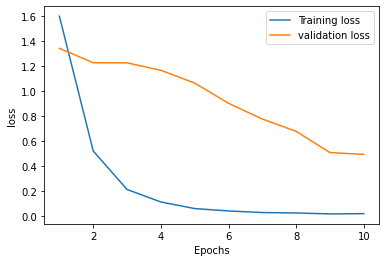

In [36]:
# 실습해보세요.
import matplotlib.pyplot as plt
%matplotlib inline
epochs = np.arange(1, len(history.history['loss'])+1)
plt.plot(epochs, history.history['loss'], label='Training loss')
plt.plot(epochs, history.history['val_loss'], label='validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

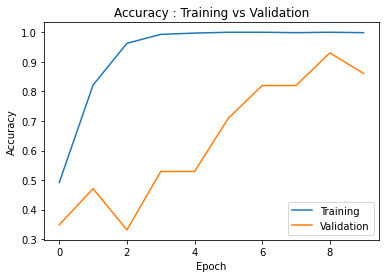

In [37]:
if not isinstance(history, dict):
    history = history.history

plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('Accuracy : Training vs Validation')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc=0)
plt.show()

<font color="green">[실습문제]</font> 6. validation 데이터를 기준으로 학습한 모델을 적용해서 f1 Score를 계산하세요.

* <font color="red">hint.</font> sklearn.metrics 패키지에서 f1_score를 사용하세요.

In [38]:
pred = model.predict(validation_generator)

In [40]:
# # 실습해보세요.
# from sklearn.metrics import f1_score
# f1_score(validation_generator,pred)

---

## [추가학습] 모델 비교하기 
_시간이 남으면 해보세요._

<font color="green">[실습문제]</font> 7. 모델 구조를 변경해 보거나 다른 모델들을 만들어 보고 성능을 비교해 최고의 모델을 만들어 보세요.
- 여러분들이 배운 모델들을 다양하게 만들어 보고 성능을 비교해 보세요.
- ImageDataGenerator를 변경하면 성능 개선도 가능합니다. 

In [ ]:
# 실습해보세요.





